# <h1><center>Salary Position Analysis </center></h1>

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/hp/Documents/dataset/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [186]:
df.shape

(10, 3)

In [187]:
df.size

30

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [189]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [190]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [191]:
df.isna().sum().any()

False

In [192]:
for unq in df.columns:
    print('{}:{} has uniqune no:s'.format(unq,df[unq].nunique()))

Position:10 has uniqune no:s
Level:10 has uniqune no:s
Salary:10 has uniqune no:s


In [193]:
df['Position'].value_counts()

Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: Position, dtype: int64

<AxesSubplot:xlabel='Level', ylabel='Salary'>

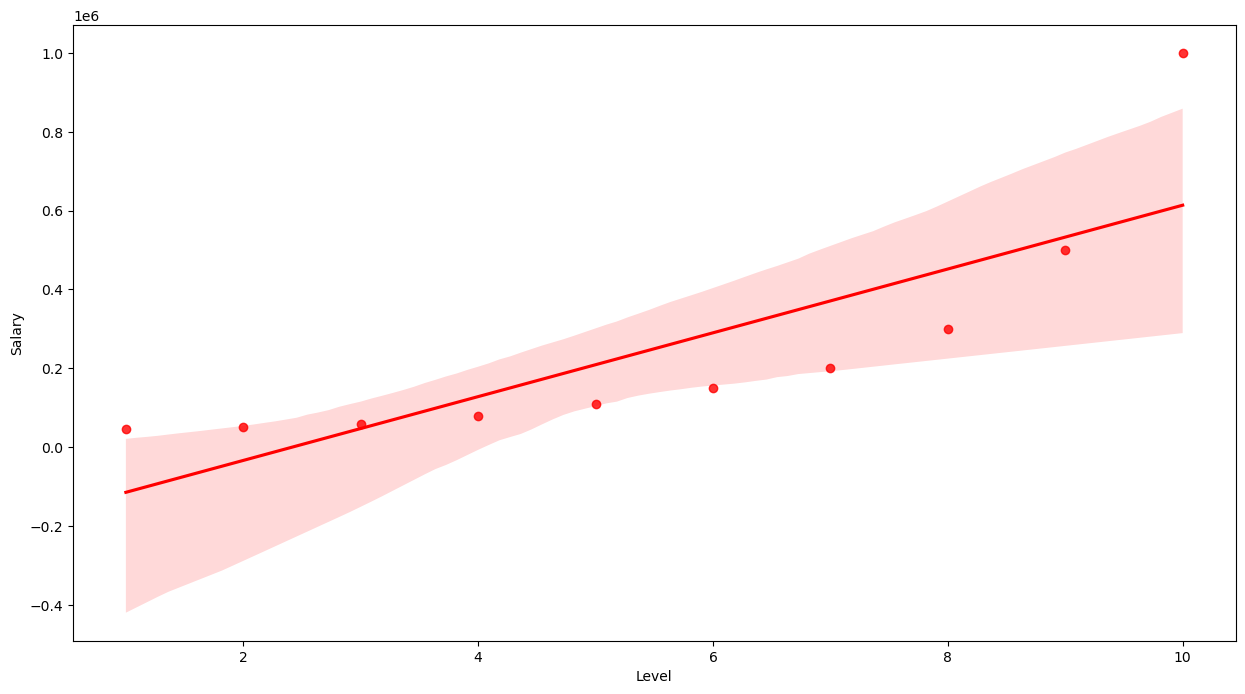

In [194]:
sns.regplot(x='Level',y='Salary',data=df,color='red')

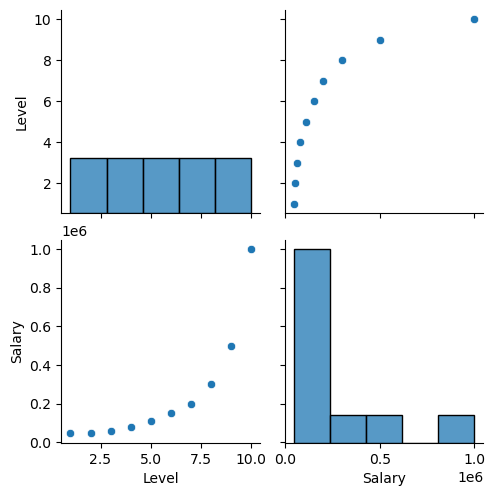

In [195]:
sns.pairplot(data=df)

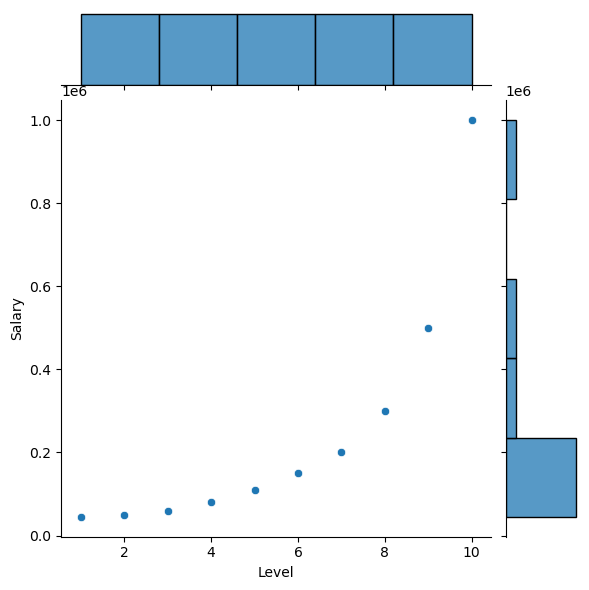

In [196]:
sns.jointplot(data=df,x='Level',y='Salary')

In [197]:
# Splitting X and Y values
y=df.iloc[:,-1].values
x=df.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [198]:
# Training X and Y values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(10, 1) (8, 1) (2, 1)


In [199]:
# Linear Regression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [200]:
# Training with Degree 2
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
reg2=LinearRegression()
reg2.fit(x_poly,y)

LinearRegression()

In [201]:
# raining with Degree 3
poly3=PolynomialFeatures(degree=3)
x_poly3=poly3.fit_transform(x)
reg3=LinearRegression()
reg3.fit(x_poly3,y)

LinearRegression()

In [202]:
# raining with Degree 4
poly4=PolynomialFeatures(degree=4)
x_poly4=poly4.fit_transform(x)
reg4=LinearRegression()
reg4.fit(x_poly4,y)

LinearRegression()

Text(0, 0.5, 'Salary')

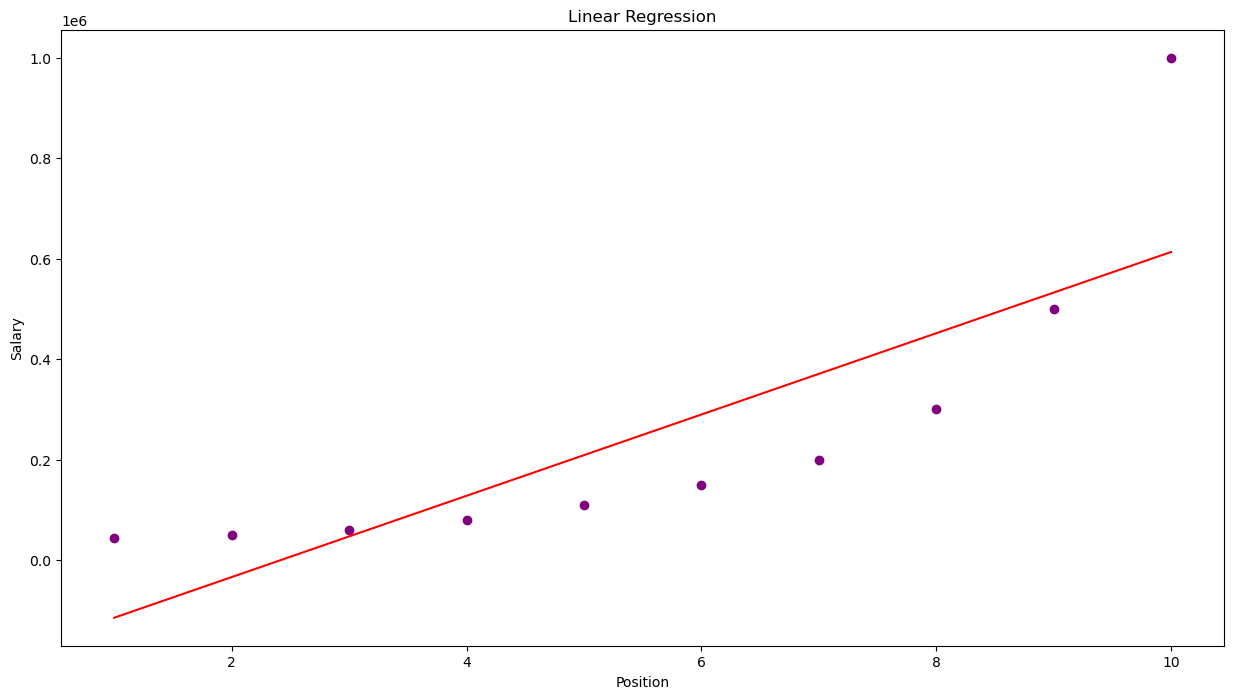

In [203]:
plt.rcParams['figure.figsize']=(15,8)
plt.scatter(x,y,color='purple')
plt.plot(x,reg.predict(x),color='red')
plt.title('Linear Regression')
plt.xlabel('Position')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

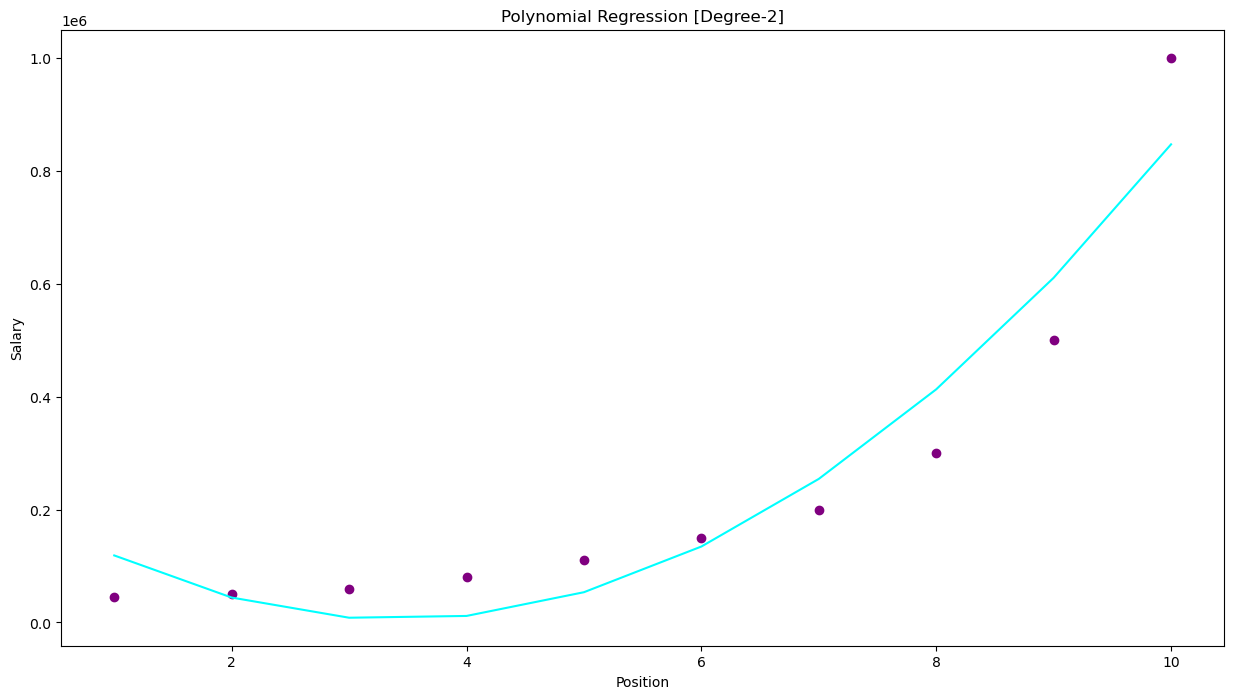

In [204]:
plt.scatter(x,y,color='purple')
plt.plot(x,reg2.predict(x_poly),color='cyan')
plt.title('Polynomial Regression [Degree-2]')
plt.xlabel('Position')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

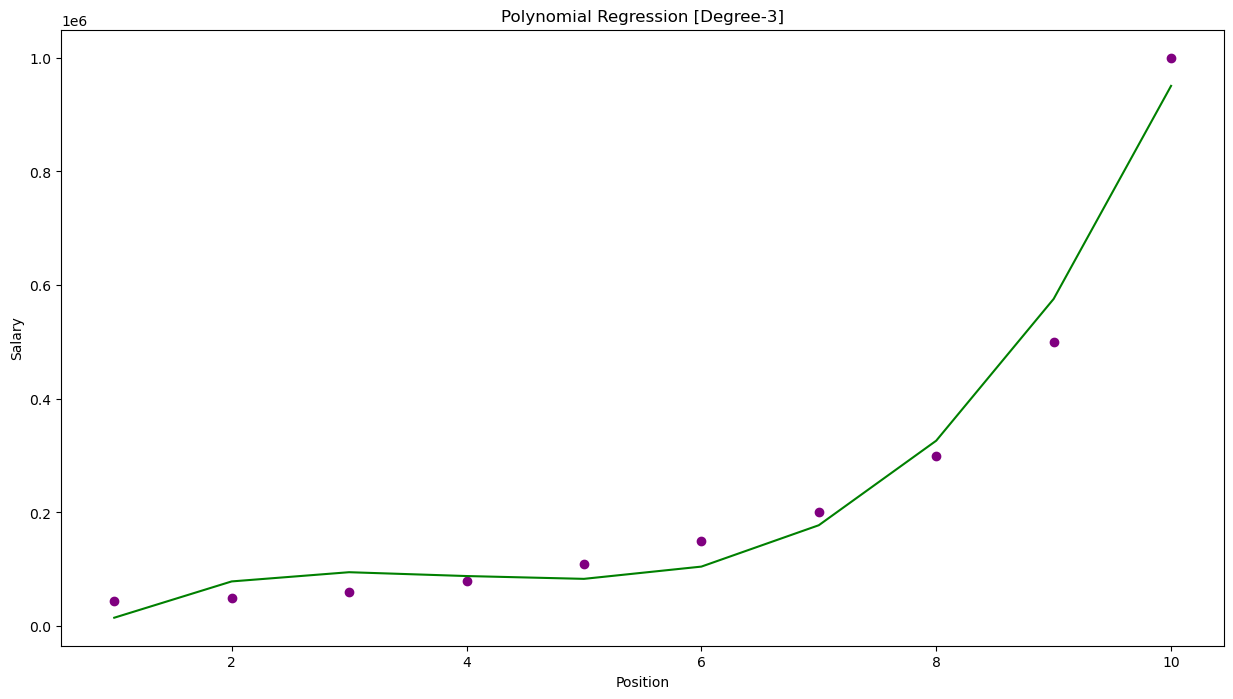

In [205]:
plt.scatter(x,y,color='purple')
plt.plot(x,reg3.predict(x_poly3),color='green')
plt.title('Polynomial Regression [Degree-3]')
plt.xlabel('Position')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

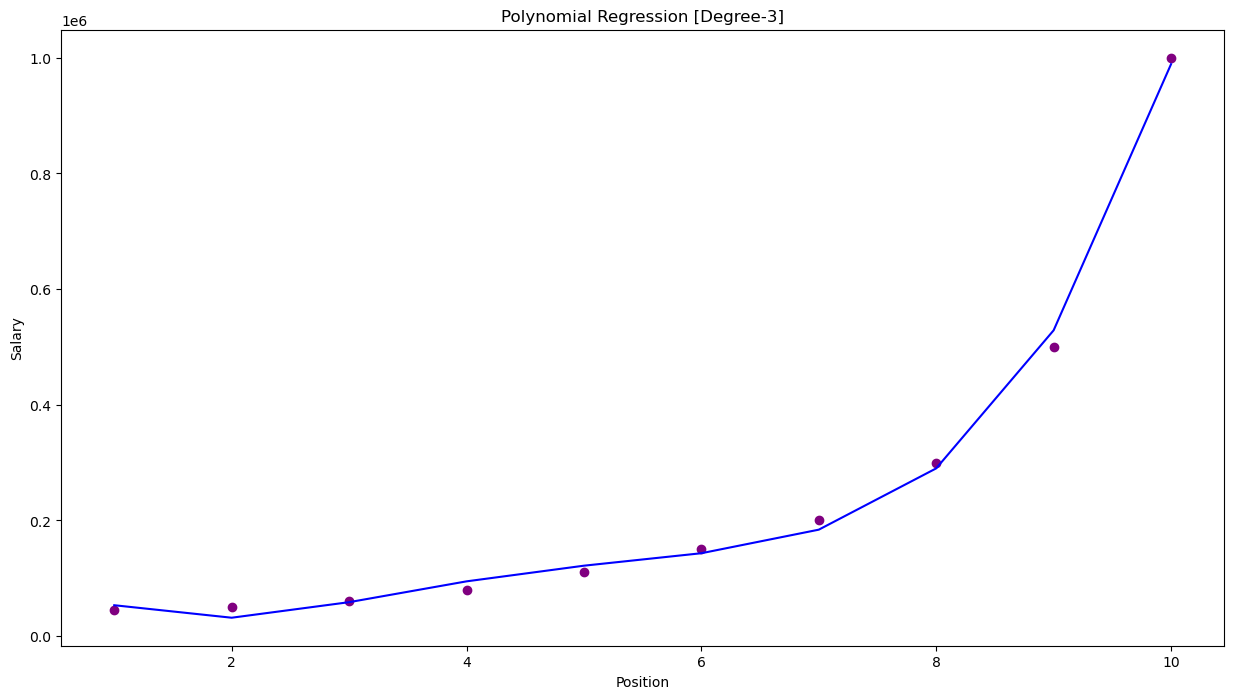

In [206]:
plt.scatter(x,y,color='purple')
plt.plot(x,reg4.predict(x_poly4),color='blue')
plt.title('Polynomial Regression [Degree-3]')
plt.xlabel('Position')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

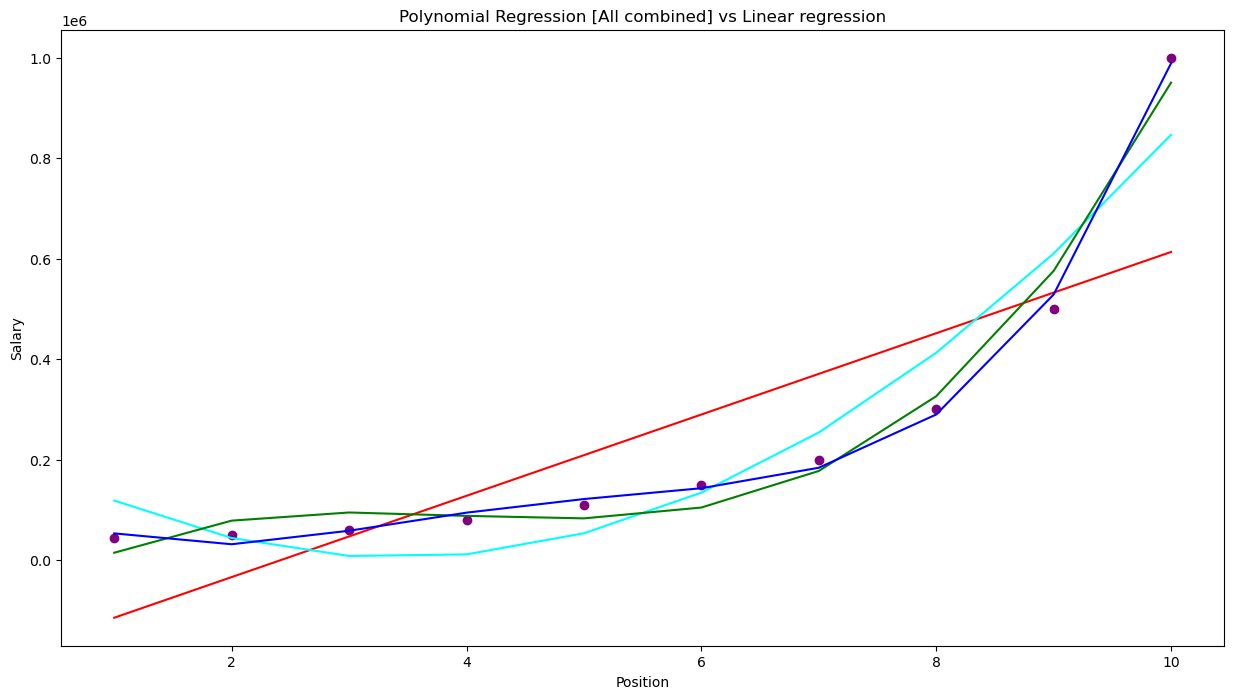

In [207]:
plt.scatter(x,y,color='purple')
plt.plot(x,reg.predict(x),color='red')
plt.plot(x,reg2.predict(x_poly),color='cyan')
plt.plot(x,reg3.predict(x_poly3),color='green')
plt.plot(x,reg4.predict(x_poly4),color='blue')
plt.title('Polynomial Regression [All combined] vs Linear regression')
plt.xlabel('Position')
plt.ylabel('Salary')